# Topic 5, Example 3: Convolution of two continuous functions

In [34]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material


Running Python: 3.9.9
Running Sympy: 1.9


In [35]:
# plotting time period
NN = 1000
ts = Symbol('t')

## Define two functions to convolve

In [36]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__pick_a_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

Impulse response $\Large g(t) = \alpha e^{-\alpha t}$ - use $\large \alpha = 2$

Input $\Large w(t) = u(t) - 2u(t-\tau)$ -use $\large \tau=5$

In [37]:
tt = np.linspace(-1,10, NN)
tau = 5
alpha = 2

w = Heaviside(ts) - 2 * Heaviside(ts - tau)
g = alpha*exp(-alpha*ts)*Heaviside(ts)
f3 = convolve(w, g, ts, 0 ,ts)

#modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
modules = ['numpy']

lam_w = lambdify(ts, w, modules=modules)
lam_g = lambdify(ts, g, modules=modules)
lam_f3 = lambdify(ts, simplify(f3), modules=modules)

In [38]:
g_notes = (1-np.exp(-alpha*tt))*u(tt) - 2*(1-np.exp(-alpha*(tt-tau)))*u(tt-tau)

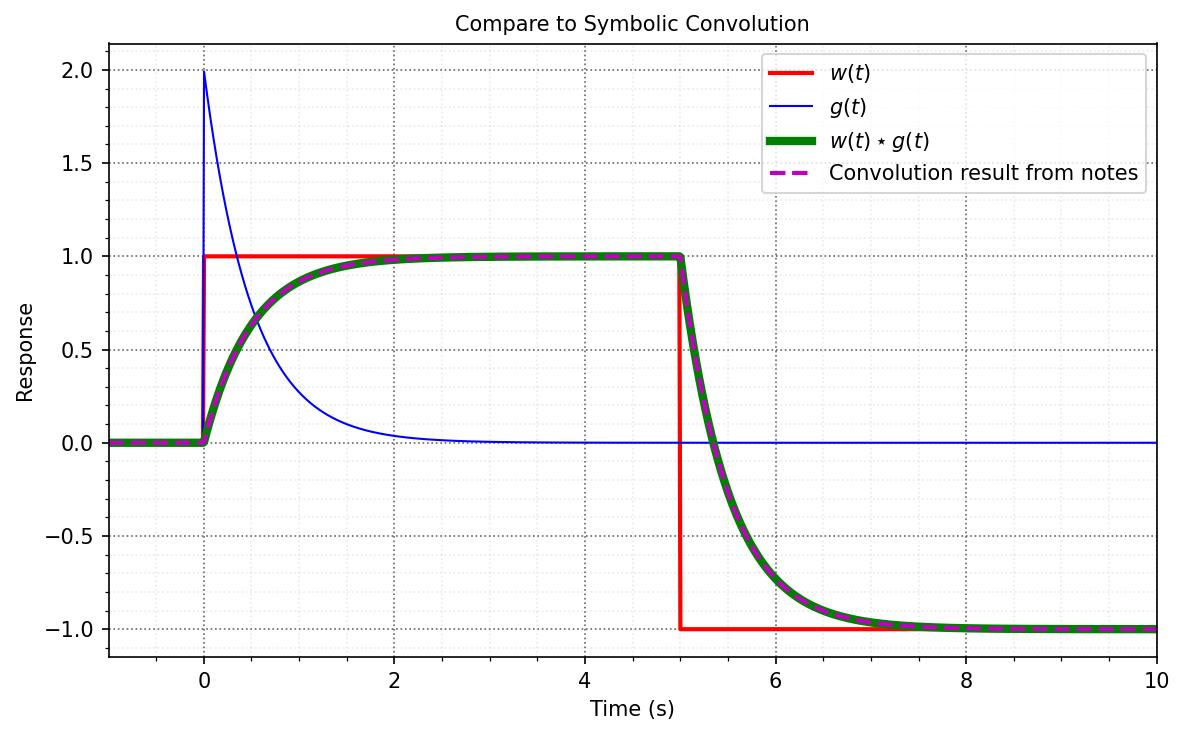

In [39]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_w(tt),'r-',linewidth=2,label='$w(t)$')
plt.plot(tt, lam_g(tt),'b-',linewidth=1,label='$g(t)$')
plt.plot(tt, lam_f3(tt),'g',linewidth=4,label='$w(t)\star g(t)$')
plt.plot(tt, g_notes,'m--',linewidth=2,label='Convolution result from notes')

nicegrid()
plt.legend()
plt.xlim(min(tt),max(tt))
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Compare to Symbolic Convolution')
savefig('figs/Topic5_ex3.png')
plt.show()